In [4]:
# Import packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell

# Set IPython to display all outputs for each cell
InteractiveShell.ast_node_interactivity = "all"


In [37]:
# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [8]:

# Explore data
df. shape
df.dtypes
df.size
df.head()
df.tail()


(891, 12)

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


10692

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
import pandas as pd

# Check if there are any missing values in each column
missing_values_any = pd.isnull(df).any()

# Check the total number of missing values in each column
missing_values_sum = pd.isnull(df).sum()

print("Missing values in each column (boolean):")
print(missing_values_any)
print("\nTotal missing values in each column:")
print(missing_values_sum)

# Display data types of each column
df_info = df.info()

print("\nData types of each column:")
print(df_info)


Missing values in each column (boolean):
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Total missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age         

In [5]:
# Number of survivors vs non-survivors
print('Counts of Labels')
df['Survived'].value_counts()

Counts of Labels


,count
Survived,
0,549
1,342


In [38]:
# Fill missing values in the 'age' column with the mean of the 'age' column
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Impute missing 'Embarked' values with the mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [39]:
#hence cabin is not needed im removing it
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
# Convert categorical features using LabelEncoder and OneHotEncoder
categorical_features = ['Sex', 'Embarked']
df[categorical_features] = df[categorical_features].apply(preprocessing.LabelEncoder().fit_transform)


In [42]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Survived' and 'Name' columns
x = df.drop(['Survived', 'Name','Ticket'], axis=1)
y = df['Survived']

# Display the first few rows of the modified DataFrame
print("Before scaling:")
print(X.head())

# Apply scaling
scaler = StandardScaler()

# Handle non-numeric columns by selecting only numeric columns for scaling
numeric_cols = x.select_dtypes(include=['number']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Display the first few rows of the scaled DataFrame
print("\nAfter scaling:")
print(X.head())

Before scaling:
   PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare  \
0    -1.730108  0.827377  0.737695 -0.592481  0.432793 -0.473674 -0.502445   
1    -1.726220 -1.566107 -1.355574  0.638789  0.432793 -0.473674  0.786845   
2    -1.722332  0.827377 -1.355574 -0.284663 -0.474545 -0.473674 -0.488854   
3    -1.718444 -1.566107 -1.355574  0.407926  0.432793 -0.473674  0.420730   
4    -1.714556  0.827377  0.737695  0.407926 -0.474545 -0.473674 -0.486337   

   Embarked  
0  0.585954  
1 -1.942303  
2  0.585954  
3  0.585954  
4  0.585954  

After scaling:
   PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare  \
0    -1.730108  0.827377  0.737695 -0.592481  0.432793 -0.473674 -0.502445   
1    -1.726220 -1.566107 -1.355574  0.638789  0.432793 -0.473674  0.786845   
2    -1.722332  0.827377 -1.355574 -0.284663 -0.474545 -0.473674 -0.488854   
3    -1.718444 -1.566107 -1.355574  0.407926  0.432793 -0.473674  0.420730   
4    -1.714556  0.827377 

In [43]:

# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1)


In [44]:

# Build a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_x, train_y)

LogisticRegression()

In [45]:
# Model coefficients
coeff = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(log.coef_))], axis=1)
coeff.columns = ['Variable', 'Coeff']
coeff.sort_values(by='Variable', ascending=False)

,Variable,Coeff
4,SibSp,-0.417684
2,Sex,-1.299893
1,Pclass,-0.962061
0,PassengerId,0.121883
5,Parch,0.021265
6,Fare,0.019502
7,Embarked,-0.221870
3,Age,-0.579589


In [47]:
# Predict on the test set
classes = log.predict(test_x)

# Evaluation metrics
print('Accuracy Score:', metrics.accuracy_score(test_y, classes))
print('Classification Report:', metrics.classification_report(test_y, classes))
print('AUC Score:', metrics.roc_auc_score(test_y, log.predict_proba(test_x)[:,1]))

Accuracy Score: 0.7982062780269058
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83       128
           1       0.80      0.71      0.75        95

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

AUC Score: 0.8348684210526317


Text(0.5, 1.0, 'ROC CHART')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

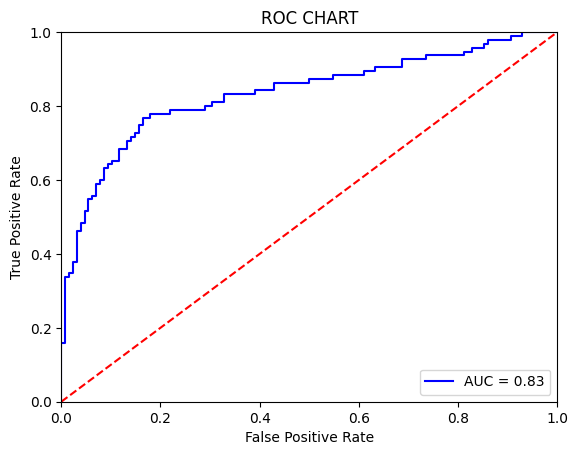

In [48]:
# ROC Curve
fpr, tpr, th = roc_curve(test_y, log.predict_proba(test_x)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC CHART')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Axes: >

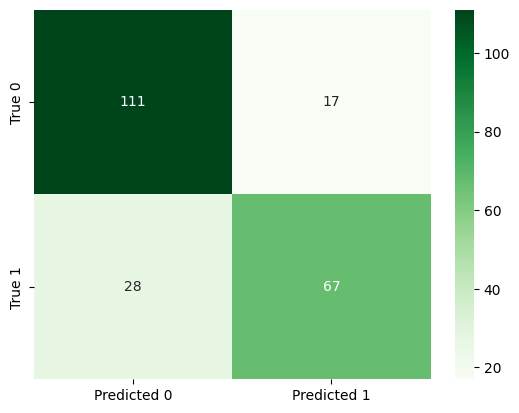

In [49]:
# Confusion Matrix
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()